## 12. 나랑 닮은 연예인을 찾아보자

### Step1. 사진 모으기

In [1]:
# 웹 서치를 통해 연예인 이미지 모으기
# 내 사진들 끼리의 얼굴 임베딩 벡터 거리 구하기
import face_recognition
import os
from PIL import Image

In [2]:
# step 2를 위한 함수
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]

    # Pillow Image로 저장
    pillow_image = Image.fromarray(cropped_face)
    save_path = os.getenv('HOME')+'/aiffel/face_embedding/pil'
    pillow_image.save(os.path.join(save_path, os.path.splitext(image_file)[0]+'.jpg'))
    return cropped_face

# step 3를 위한 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict    

In [3]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/nsh'

In [4]:
embedding_dict = get_face_embedding_dict(dir_path)

In [5]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('남승호1', '남승호2')

0.21954935790546384

- 동일인물이라도 0.22정도의 차이가 난다

### Step2. 얼굴 영역 자르기

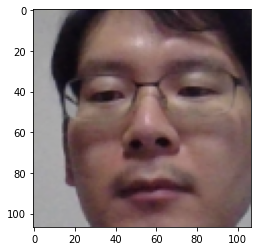

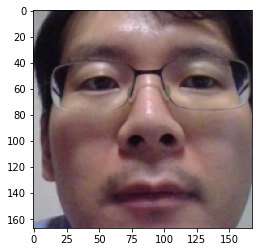

In [6]:
# 내 사진의 cropped face

%matplotlib inline
import matplotlib.pyplot as plt

image_path = dir_path+'/남승호1.png'
cropped_face1 = get_cropped_face(image_path)

image_path = dir_path+'/남승호2.png'
cropped_face2 = get_cropped_face(image_path)
plt.figure()
plt.imshow(cropped_face1)
plt.figure()
plt.imshow(cropped_face2)


### Step3. 얼굴 영역의 임베딩 추출하기

In [7]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/'
embedding_dict = get_face_embedding_dict(dir_path)

### Step4. 모은 연예인들과 비교하기

In [8]:
# step4.모은 연예인들과 비교하기
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i==0:
            continue
        if sorted_faces[i]:
            print('순위 {}: 이름({}), 거리({}))'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0]) ) )


In [9]:
get_nearest_face('남승호1')

순위 1: 이름(이정재), 거리(0.4562685910201801))
순위 2: 이름(배용준), 거리(0.5592572885659269))
순위 3: 이름(조성모), 거리(0.5818512440963434))
순위 4: 이름(박보검), 거리(0.6421731074333559))
순위 5: 이름(정해인), 거리(0.6581197416579372))


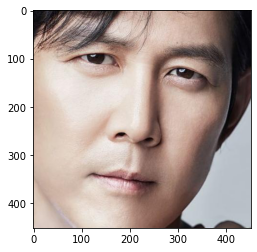

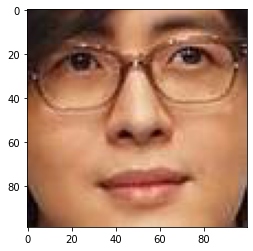

In [10]:
import matplotlib.image as mpimg

save_path = os.getenv('HOME')+'/aiffel/face_embedding/pil/'
image_path = save_path+'이정재.jpg'
img = mpimg.imread(image_path)
plt.figure()
plt.imshow(img)
image_path = save_path+'배용준.jpg'
img = mpimg.imread(image_path)
plt.figure()
plt.imshow(img)

- 저와 가장 비슷한 연예인은 이정재로 밝혀졌습니다. (거리 0.46이하)